In [194]:
import pygame
import random
from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

plt.style.use('fivethirtyeight')

pygame.init()

WINDOW_WIDTH = 1000
WINDOW_HEIGHT = 1000
window = pygame.display.set_mode((WINDOW_WIDTH, WINDOW_HEIGHT))
pygame.display.set_caption("Intersection Simulation")

BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
RED = (255, 0, 0, 100)
GREEN = (0, 255, 0, 100)
YELLOW = (255, 255, 0, 100)
GRAY = (60, 60, 60)

ambient_1 = pygame.image.load('assets/img/ambient_1.png')
ambient_2 = pygame.image.load('assets/img/ambient_2.png')
ambient_3 = pygame.image.load('assets/img/ambient_3.png')
ambient_4 = pygame.image.load('assets/img/ambient_4.png')

try:
    pygame.mixer.init()
    # Set audio effect in loop
    pygame.mixer.music.load('assets/audio/Street Sound Effect.mp3')
    pygame.mixer.music.play(-1)
except pygame.error as e:
    print(f"Warning: {e}")

# Load image, resize it to be 370x370 and put it in the right corner
ambient_1 = pygame.transform.scale(ambient_1, (WINDOW_WIDTH//2 - 30, WINDOW_HEIGHT//2 - 30))
ambient_2 = pygame.transform.scale(ambient_2, (WINDOW_WIDTH//2 - 30, WINDOW_HEIGHT//2 - 30))
ambient_3 = pygame.transform.scale(ambient_3, (WINDOW_WIDTH//2 - 30, WINDOW_HEIGHT//2 - 30))
ambient_4 = pygame.transform.scale(ambient_4, (WINDOW_WIDTH//2 - 30, WINDOW_HEIGHT//2 - 30))
window.blit(ambient_1, (0, 0))
window.blit(ambient_2, (WINDOW_WIDTH//2 + 30, 0))
window.blit(ambient_3, (WINDOW_WIDTH//2 + 30, WINDOW_HEIGHT//2 + 30))
window.blit(ambient_4, (0, WINDOW_HEIGHT//2 + 30))

class Car:
    def __init__(self, x, y, direction):
        self.x = x
        self.y = y
        self.direction = direction
        self.speed = 2
        self.width = 20
        self.length = 40
        self.stopped = False
        self.color = (random.randint(1, 255), random.randint(1, 255), random.randint(1, 255))
        self.turn_right = random.choice([False, True])
        self.waiting_time = 0

    def move(self):
        if not self.stopped:
            if self.direction == 'up':
                self.y -= self.speed
            elif self.direction == 'down':
                self.y += self.speed
            elif self.direction == 'left':
                self.x -= self.speed
            elif self.direction == 'right':
                self.x += self.speed

    def draw(self, win, pygame):
        if self.direction == 'up':
            pygame.draw.rect(win, self.color, (self.x, self.y, self.width, self.length))
            # Check if car wants to turn, if so add a blinking turn signal
            if self.turn_right == True and pygame.time.get_ticks()//1000 % 2 == 0:
                pygame.draw.polygon(win, (255, 85, 0), [(self.x + 20, self.y), (self.x + 20, self.y + 10), (self.x + 25, self.y - 5), (self.x + 25, self.y + 15)])
            # Add waiting_time text to the car that moves with it
            font = pygame.font.Font(None, 20)
            text = font.render(str(self.waiting_time//30), True, (255, 255, 255))
            text = pygame.transform.rotate(text, 90)
            win.blit(text, (self.x + 5, self.y + 5))
        elif self.direction == 'down':
            pygame.draw.rect(win, self.color, (self.x, self.y, self.width, self.length))
            # Check if car wants to turn, if so add a blinking turn signal
            if self.turn_right == True and pygame.time.get_ticks()//1000 % 2 == 0:
                pygame.draw.polygon(win, (255, 85, 0), [(self.x, self.y + 40), (self.x, self.y + 30), (self.x - 5, self.y + 45), (self.x - 5, self.y + 25)])
            # Add waiting_time text to the car that moves with it
            font = pygame.font.Font(None, 20)
            text = font.render(str(self.waiting_time//30), True, (255, 255, 255))
            text = pygame.transform.rotate(text, 90)
            win.blit(text, (self.x + 5, self.y + 5))
        elif self.direction == 'left':
            pygame.draw.rect(win, self.color, (self.x, self.y, self.length, self.width))
            # Check if car wants to turn, if so add a blinking turn signal
            if self.turn_right == True and pygame.time.get_ticks()//1000 % 2 == 0:
                pygame.draw.polygon(win, (255, 85, 0), [(self.x, self.y), (self.x + 10, self.y), (self.x - 5, self.y - 5), (self.x + 15, self.y - 5)])
            # Add waiting_time text to the car that moves with it
            font = pygame.font.Font(None, 20)
            text = font.render(str(self.waiting_time//30), True, (255, 255, 255))
            win.blit(text, (self.x + 5, self.y + 5))
        else:
            pygame.draw.rect(win, self.color, (self.x, self.y, self.length, self.width))
            # Check if car wants to turn, if so add a blinking turn signal
            if self.turn_right == True and pygame.time.get_ticks()//1000 % 2 == 0:
                pygame.draw.polygon(win, (255, 85, 0), [(self.x + 40, self.y + 20), (self.x + 30, self.y + 20), (self.x + 45, self.y + 25), (self.x + 25, self.y + 25)])
            # Add waiting_time text to the car that moves with it
            font = pygame.font.Font(None, 20)
            text = font.render(str(self.waiting_time//30), True, (255, 255, 255))
            win.blit(text, (self.x + 5, self.y + 5))

    def stop(self):
        self.stopped = True

    def can_move(self, other_cars):
        for other_car in other_cars:
            if other_car.stopped:
                if self.direction == other_car.direction == 'up':
                    if other_car.y + other_car.length + 4 <= self.y <= other_car.y + other_car.length + 6:
                        return False
                elif self.direction == other_car.direction == 'down':
                    if other_car.y - self.length - 6 <= self.y <= other_car.y - self.length - 4:
                        return False
                elif self.direction == other_car.direction == 'left':
                    if other_car.x + other_car.length + 4 <= self.x <= other_car.x + other_car.length + 6:
                        return False
                elif self.direction == other_car.direction == 'right':
                    if other_car.x - self.length - 6 <= self.x <= other_car.x - self.length - 4:
                        return False
        return True

    def turn_or_straight(self):
        if self.turn_right == True:
            if self.direction == 'up' and self.y <= WINDOW_HEIGHT//2:
                self.direction = 'right'
                self.x += self.length // 2
                self.y = WINDOW_HEIGHT//2 + 5
                self.turn_right = False
            elif self.direction == 'down' and self.y + self.length >= WINDOW_HEIGHT//2:
                self.direction = 'left'
                self.x -= self.length // 2
                self.y = WINDOW_HEIGHT//2 - 20 - 4
                self.turn_right = False
            elif self.direction == 'left' and self.x <= WINDOW_WIDTH//2:
                self.direction = 'up'
                self.x = WINDOW_WIDTH//2 + 5
                self.y -= self.length // 2
                self.turn_right = False
            elif self.direction == 'right' and self.x + self.length >= WINDOW_WIDTH//2:
                self.direction = 'down'
                self.x = WINDOW_WIDTH//2 - 20 - 4
                self.y += self.length // 2
                self.turn_right = False

class Stoplight:
    def __init__(self, color):
        self.color_NS = color
        if self.color_NS == GREEN:
            self.color_EW = RED
        else:
            self.color_EW = GREEN
        self.time_yellow = 0
        self.time_green = 0
        self.queue_lengths = {'up': 0, 'down': 0, 'left': 0, 'right': 0}

    def switch_yellow(self):
        if self.color_NS == GREEN:
            self.color_NS = YELLOW
        elif self.color_EW == GREEN:
            self.color_EW = YELLOW

    def update_stoplight(self):
        if self.color_NS == GREEN or self.color_EW == GREEN:
            self.time_green += 1
        if self.color_NS == YELLOW or self.color_EW == YELLOW:
            self.time_yellow += 1

        if self.time_yellow >= 90:
            if self.color_NS == YELLOW:
                self.color_NS = RED
                self.color_EW = GREEN
                self.time_green = 0
            elif self.color_EW == YELLOW:
                self.color_EW = RED
                self.color_NS = GREEN
                self.time_green = 0
            self.time_yellow = 0

class TrafficMDP:
    '''
    TrafficMDP class that represents the Markov Decision Process for the traffic intersection.

    Attributes:
    - states: list of states in the MDP (S)
    - actions: list of actions in the MDP (A)
    - discount_factor: discount factor for the MDP (gamma)
    - theta: threshold for the policy evaluation
    - values: dictionary of state values (V)
    - policy: dictionary of state-action pairs (pi)
    '''
    def __init__(self):
        self.states = ['EW', 'NS']
        self.actions = ['maintain', 'change']
        self.discount_factor = 0.95
        self.theta = 0.01
        self.values = {state: 0 for state in self.states}
        self.policy = {
            'EW': {'maintain': 0.5, 'change': 0.5},
            'NS': {'maintain': 0.5, 'change': 0.5}
        }

    def get_reward(self, cars, action, state):
        '''
        Get the reward R(s, a) for a given state-action pair.

        Parameters:
        - cars: list of Car objects
        - action: action to take
        - state: state to transition to

        Returns:
        - reward: reward for the given state-action pair

        I the action is 'change', the reward is the average waiting time of stopped cars divided by the number of incoming cars where the stoplight is green.
        If the action is 'maintain', the reward is the number of incoming cars where the stoplight is green divided by the average waiting time of stopped cars.
        In this way, the reward is high when there are many incoming cars where the stoplight is green, and also when the the stopped cars have been waiting for a long time.
        '''
        if state == 'EW':
            stopped_cars = [car for car in cars if 
                            car.direction in ['up', 'down']
                            and car.stopped]
            incoming_cars = len([car for car in cars if 
                                 (car.x > WINDOW_WIDTH//2 and car.direction == 'left') 
                                 or (car.x < WINDOW_WIDTH//2 and car.direction == 'right') 
                                 and not car.stopped ])
        else:
            stopped_cars = [car for car in cars if
                            car.direction in ['left', 'right']
                            and car.stopped]
            incoming_cars = len([car for car in cars if (car.y > WINDOW_HEIGHT//2 and car.direction == 'up')
                                 or (car.y < WINDOW_HEIGHT//2 and car.direction == 'down')
                                 and not car.stopped])

        avg_wait_time = sum(car.waiting_time//30 for car in stopped_cars) / len(stopped_cars) if stopped_cars else 0

        if action == 'change':
            return avg_wait_time / incoming_cars if incoming_cars > 0 else avg_wait_time
        else:
            return incoming_cars / avg_wait_time if avg_wait_time > 0 else incoming_cars if incoming_cars > 0 else 1 # To avoid reward = 0 when there are no incoming cars
        
    def get_transition_probability(self, cars, action, state, next_state):
        '''
        Get the transition probability P(s', r| s, a) for a given state-action pair.

        Parameters:
        - cars: list of Car objects
        - action: action to take (a)
        - state: current state (s)
        - next_state: next state (s')

        Returns:
        - probability: transition probability P(s', r| s, a)

        The transition probability is 0 if the action is 'maintain' and s is different from s', or if the action is 'change' and s is the same as s'.
        Otherwise, the transition probability is 1 if the action is 'maintain' and the reward for maintaining is greater than the reward for changing,
        or if the action is 'change' and the reward for changing is greater than the reward for maintaining.
        In all other cases, the transition probability is 0.
        '''
        if action == 'maintain' and state != next_state:
            return 0
        elif action == 'change' and state == next_state:
            return 0
        
        change_reward = self.get_reward(cars, 'change', state)
        maintain_reward = self.get_reward(cars, 'maintain', state)

        if action == 'maintain' and maintain_reward > change_reward:
            return 1
        elif action == 'change' and change_reward > maintain_reward:
            return 1
        else:
            return 0

    def policy_evaluation(self, cars):
        '''
        Evaluate the policy using iterative policy evaluation.

        Parameters:
        - cars: list of Car objects

        This implementation follows the iterative policy evaluation algorithm seen during the course.
        '''
        while True:
            delta = 0
            for state in self.states:
                v = self.values[state]

                new_value = 0
                for state_ in self.states:
                    new_value += self.get_transition_probability(cars, self.get_action(state), state, state_) * (self.get_reward(cars, self.get_action(state), state_) + self.discount_factor * self.values[state_])

                self.values[state] = new_value

                delta = max(delta, abs(v - self.values[state]))
            if delta < self.theta:
                return

    def policy_improvement(self, cars):
        '''
        Improve the policy using policy improvement.

        Parameters:
        - cars: list of Car objects

        Returns:
        - policy_stable: boolean indicating if the policy is stable

        This implementation follows the policy improvement algorithm seen during the course.
        '''
        policy_stable = True
        for state in self.states:
            old_action = self.get_action(state)

            action_values = {action: 0 for action in self.actions}
            for state_ in self.states:
                action_values = {action: action_values[action] + (self.get_transition_probability(cars, action, state, state_) * (self.get_reward(cars, action, state_) + self.discount_factor * self.values[state_])) for action in self.actions}

            best_action = max(action_values, key=action_values.get)
            self.policy[state] = {action: 1 if action == best_action else 0 for action in self.actions}

            if old_action != best_action:
                policy_stable = False

        return policy_stable

    def policy_iteration(self, cars):
        '''
        Perform policy iteration.

        Parameters:
        - cars: list of Car objects

        This implementation follows the policy iteration algorithm seen during the course.
        '''
        while True:
            self.policy_evaluation(cars)

            if self.policy_improvement(cars):
                return

    def get_action(self, state):
        '''
        Get the action to take in a given state.

        Parameters:
        - state: current state

        Returns:
        - action: action to take

        This method returns the action to take in a given state according to the policy (pi*(s)).
        '''
        return random.choices(self.actions, weights=[self.policy[state]['maintain'], self.policy[state]['change']])[0]

cumulative_waiting_times = {'mdp': [0], 'ft': [0]}

queue_lengths = {'mdp': [], 'ft': []}

n_stopped_cars = {'mdp': 0, 'ft': 0}

init_color = random.choice([GREEN, RED])

def main():
    run = True
    clock = pygame.time.Clock()

    cars = []
    prev_time = 0
    stoplight = Stoplight(init_color)
    mdp = TrafficMDP()
    frame_count = 0
    seconds_elapsed = 0

    test = 'mdp'
    queued_cars = {'up': 0, 'down': 0, 'left': 0, 'right': 0}
    cumulative_waiting_time = 0

    while run:
        clock.tick(30)
        stoplight.update_stoplight()
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                run = False
        time = round(pygame.time.get_ticks() / 1000, 1)
        if time != prev_time:
            if time % 1.5 == 0:
                if time < 60 or (360 < time and time < 390):
                    direction = random.choice(['up', 'down'])
                    if direction == 'up':
                        cars.append(Car(WINDOW_WIDTH//2 + 5, WINDOW_HEIGHT, direction))
                    elif direction == 'down':
                        cars.append(Car(WINDOW_WIDTH//2 - 20 - 4, 0, direction))
                    elif direction == 'left':
                        cars.append(Car(WINDOW_WIDTH, WINDOW_HEIGHT//2 - 20 - 4, direction))
                    elif direction == 'right':
                        cars.append(Car(0, WINDOW_HEIGHT//2 + 5, direction))
                elif 120 < time and time < 180 or (420 < time and time < 480):
                    direction = random.choice(['right', 'left'])
                    if direction == 'up':
                        cars.append(Car(WINDOW_WIDTH//2 + 5, WINDOW_HEIGHT, direction))
                    elif direction == 'down':
                        cars.append(Car(WINDOW_WIDTH//2 - 20 - 4, 0, direction))
                    elif direction == 'left':
                        cars.append(Car(WINDOW_WIDTH, WINDOW_HEIGHT//2 - 20 - 4, direction))
                    elif direction == 'right':
                        cars.append(Car(0, WINDOW_HEIGHT//2 + 5, direction))
                else:
                    direction = random.choice(['up', 'down', 'right', 'left'])
                    if direction == 'up':
                        cars.append(Car(WINDOW_WIDTH//2 + 5, WINDOW_HEIGHT, direction))
                    elif direction == 'down':
                        cars.append(Car(WINDOW_WIDTH//2 - 20 - 4, 0, direction))
                    elif direction == 'left':
                        cars.append(Car(WINDOW_WIDTH, WINDOW_HEIGHT//2 - 20 - 4, direction))
                    elif direction == 'right':
                        cars.append(Car(0, WINDOW_HEIGHT//2 + 5, direction))
                if int(time) == 300:
                    test = 'ft'
                    stoplight = Stoplight(init_color)
                if time > 600:
                    run = False

            if time % 1 == 0:
                cumulative_waiting_times[test].append(cumulative_waiting_time//30)

            prev_time = time

        frame_count += 1
        seconds_elapsed = frame_count // 30

        if (stoplight.color_NS == GREEN or stoplight.color_EW == GREEN) and seconds_elapsed >= 7 and test == 'mdp':
            state = 'NS' if stoplight.color_NS == GREEN else 'EW'
            mdp.policy_iteration(cars)
            action = mdp.get_action(state)
            if action == 'change':
                stoplight.switch_yellow()
                seconds_elapsed = 0
                frame_count = 0
        elif (stoplight.color_NS == GREEN or stoplight.color_EW == GREEN) and seconds_elapsed >= 7 and test == 'ft':
            stoplight.switch_yellow()
            seconds_elapsed = 0
            frame_count = 0

        for car in cars:
            if not car.stopped:
                if ((car.direction == 'up' and car.y == WINDOW_HEIGHT//2 + 50 and (stoplight.color_NS == RED or stoplight.color_NS == YELLOW)) or
                    (car.direction == 'down' and car.y + car.length == WINDOW_HEIGHT//2 - 50 and (stoplight.color_NS == RED or stoplight.color_NS == YELLOW)) or
                    (car.direction == 'left' and car.x == WINDOW_WIDTH//2 + 50 and (stoplight.color_EW == RED or stoplight.color_EW == YELLOW)) or
                    (car.direction == 'right' and car.x + car.length == WINDOW_WIDTH//2 - 50 and (stoplight.color_EW == RED or stoplight.color_EW == YELLOW))) or not car.can_move(cars):
                    car.stop()
                    # Increase the number of queued cars by 1
                    queued_cars[car.direction] += 1
                    stoplight.queue_lengths[car.direction] += 1
                    # Increase the number of stopped cars by 1 for the statistics
                    n_stopped_cars[test] += 1
                else:
                    if ((car.direction == 'up' and car.y <= WINDOW_HEIGHT//2 + car.speed and car.y >= WINDOW_HEIGHT//2 - car.speed) or
                        (car.direction == 'down' and car.y + car.length >= WINDOW_HEIGHT//2 - car.speed and car.y + car.length <= WINDOW_HEIGHT//2 + car.speed) or
                        (car.direction == 'left' and car.x <= WINDOW_WIDTH//2 + car.speed and car.x >= WINDOW_WIDTH//2 - car.speed) or
                        (car.direction == 'right' and car.x + car.length >= WINDOW_WIDTH//2 - car.speed and car.x + car.length <= WINDOW_WIDTH//2 + car.speed)):
                        car.turn_or_straight()
                    car.move()
            elif car.stopped and ((car.direction in ['up', 'down'] and stoplight.color_NS == GREEN) or (car.direction in ['left', 'right'] and stoplight.color_EW == GREEN)):
                # Decrease the number of queued cars by 1
                queued_cars[car.direction] -= 1
                # When the queue is freed, add the queue length to the queue_lengths list
                if queued_cars[car.direction] == 0:
                    queue_lengths[test].append(stoplight.queue_lengths[car.direction])
                    stoplight.queue_lengths[car.direction] = 0
                car.stopped = False
                car.move()
            if car.stopped:
                # Increase the waiting time of the car by 1 for the model
                car.waiting_time += 1
                # Increase the cumulative waiting time by 1 for the statistics
                cumulative_waiting_time += 1

        cars = [car for car in cars if 0 <= car.x <= WINDOW_WIDTH and 0 <= car.y <= WINDOW_HEIGHT]

        # Draw intersection
        ## Draw road
        pygame.draw.line(window, GRAY, (0, WINDOW_HEIGHT//2), (WINDOW_WIDTH, WINDOW_HEIGHT//2), 60)
        pygame.draw.line(window, GRAY, (WINDOW_WIDTH//2, 0), (WINDOW_WIDTH//2, WINDOW_HEIGHT), 60)
        ## Draw lanes
        pygame.draw.line(window, WHITE, (0, WINDOW_HEIGHT//2 - 28), (WINDOW_WIDTH, WINDOW_HEIGHT//2 - 28), 1)
        pygame.draw.line(window, WHITE, (0, WINDOW_HEIGHT//2 + 28), (WINDOW_WIDTH, WINDOW_HEIGHT//2 + 28), 1)
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2 - 28, 0), (WINDOW_WIDTH//2 - 28, WINDOW_HEIGHT), 1)
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2 + 28, 0), (WINDOW_WIDTH//2 + 28, WINDOW_HEIGHT), 1)
        pygame.draw.line(window, WHITE, (0, WINDOW_HEIGHT//2), (WINDOW_WIDTH, WINDOW_HEIGHT//2), 4)
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2, 0), (WINDOW_WIDTH//2, WINDOW_HEIGHT), 4)
        ## Draw crosswalks
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2 - 23, WINDOW_HEIGHT//2 - 200), (WINDOW_WIDTH//2 - 23, WINDOW_HEIGHT//2 - 180), 2)
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2 - 17, WINDOW_HEIGHT//2 -200), (WINDOW_WIDTH//2 - 17, WINDOW_HEIGHT//2 - 180), 2)
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2 - 12, WINDOW_HEIGHT//2 - 200), (WINDOW_WIDTH//2 - 12, WINDOW_HEIGHT//2 - 180), 2)
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2 - 6, WINDOW_HEIGHT//2 - 200), (WINDOW_WIDTH//2 - 6, WINDOW_HEIGHT//2 - 180), 2)
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2 + 6, WINDOW_HEIGHT//2 - 200), (WINDOW_WIDTH//2 + 6, WINDOW_HEIGHT//2 - 180), 2)
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2 + 12, WINDOW_HEIGHT//2 - 200), (WINDOW_WIDTH//2 + 12, WINDOW_HEIGHT//2 - 180), 2)
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2 + 17, WINDOW_HEIGHT//2 - 200), (WINDOW_WIDTH//2 + 17, WINDOW_HEIGHT//2 - 180), 2)
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2 + 23, WINDOW_HEIGHT//2 - 200), (WINDOW_WIDTH//2 + 23, WINDOW_HEIGHT//2 - 180), 2)
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2 - 200, WINDOW_HEIGHT//2 - 23), (WINDOW_WIDTH//2 - 180, WINDOW_HEIGHT//2 - 23), 2)
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2 - 200, WINDOW_HEIGHT//2 - 17), (WINDOW_WIDTH//2 - 180, WINDOW_HEIGHT//2 - 17), 2)
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2 - 200, WINDOW_HEIGHT//2 - 12), (WINDOW_WIDTH//2 - 180, WINDOW_HEIGHT//2 - 12), 2)
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2 - 200, WINDOW_HEIGHT//2 - 6), (WINDOW_WIDTH//2 - 180, WINDOW_HEIGHT//2 - 6), 2)
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2 - 200, WINDOW_HEIGHT//2 + 6), (WINDOW_WIDTH//2 - 180, WINDOW_HEIGHT//2 + 6), 2)
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2 - 200, WINDOW_HEIGHT//2 + 12), (WINDOW_WIDTH//2 - 180, WINDOW_HEIGHT//2 + 12), 2)
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2 - 200, WINDOW_HEIGHT//2 + 17), (WINDOW_WIDTH//2 - 180, WINDOW_HEIGHT//2 + 17), 2)
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2 - 200, WINDOW_HEIGHT//2 + 23), (WINDOW_WIDTH//2 - 180, WINDOW_HEIGHT//2 + 23), 2)
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2 + 180, WINDOW_HEIGHT//2 - 23), (WINDOW_WIDTH//2 + 200, WINDOW_HEIGHT//2 - 23), 2)
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2 + 180, WINDOW_HEIGHT//2 - 17), (WINDOW_WIDTH//2 + 200, WINDOW_HEIGHT//2 - 17), 2)
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2 + 180, WINDOW_HEIGHT//2 - 12), (WINDOW_WIDTH//2 + 200, WINDOW_HEIGHT//2 - 12), 2)
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2 + 180, WINDOW_HEIGHT//2 - 6), (WINDOW_WIDTH//2 + 200, WINDOW_HEIGHT//2 - 6), 2)
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2 + 180, WINDOW_HEIGHT//2 + 6), (WINDOW_WIDTH//2 + 200, WINDOW_HEIGHT//2 + 6), 2)
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2 + 180, WINDOW_HEIGHT//2 + 12), (WINDOW_WIDTH//2 + 200, WINDOW_HEIGHT//2 + 12), 2)
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2 + 180, WINDOW_HEIGHT//2 + 17), (WINDOW_WIDTH//2 + 200, WINDOW_HEIGHT//2 + 17), 2)
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2 + 180, WINDOW_HEIGHT//2 + 23), (WINDOW_WIDTH//2 + 200, WINDOW_HEIGHT//2 + 23), 2)
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2 - 23, WINDOW_HEIGHT//2 + 200), (WINDOW_WIDTH//2 - 23, WINDOW_HEIGHT//2 + 220), 2)
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2 - 17, WINDOW_HEIGHT//2 + 200), (WINDOW_WIDTH//2 - 17, WINDOW_HEIGHT//2 + 220), 2)
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2 - 12, WINDOW_HEIGHT//2 + 200), (WINDOW_WIDTH//2 - 12, WINDOW_HEIGHT//2 + 220), 2)
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2 - 6, WINDOW_HEIGHT//2 + 200), (WINDOW_WIDTH//2 - 6, WINDOW_HEIGHT//2 + 220), 2)
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2 + 6, WINDOW_HEIGHT//2 + 200), (WINDOW_WIDTH//2 + 6, WINDOW_HEIGHT//2 + 220), 2)
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2 + 12, WINDOW_HEIGHT//2 + 200), (WINDOW_WIDTH//2 + 12, WINDOW_HEIGHT//2 + 220), 2)
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2 + 17, WINDOW_HEIGHT//2 + 200), (WINDOW_WIDTH//2 + 17, WINDOW_HEIGHT//2 + 220), 2)
        pygame.draw.line(window, WHITE, (WINDOW_WIDTH//2 + 23, WINDOW_HEIGHT//2 + 200), (WINDOW_WIDTH//2 + 23, WINDOW_HEIGHT//2 + 220), 2)
        ## Cover intersection
        pygame.draw.rect(window, GRAY, (WINDOW_WIDTH//2 - 29, WINDOW_HEIGHT//2 - 29, 60, 60))
        ## Draw stoplights as stop lines
        pygame.draw.line(window, stoplight.color_NS, (WINDOW_WIDTH//2 - 27, WINDOW_HEIGHT//2 - 32), (WINDOW_WIDTH//2 - 2, WINDOW_HEIGHT//2 - 32), 5)
        pygame.draw.line(window, stoplight.color_NS, (WINDOW_WIDTH//2 + 3, WINDOW_HEIGHT//2 + 33), (WINDOW_WIDTH//2 + 27, WINDOW_HEIGHT//2 + 33), 5)
        pygame.draw.line(window, stoplight.color_EW, (WINDOW_WIDTH//2 - 32, WINDOW_HEIGHT//2 + 3), (WINDOW_WIDTH//2 - 32, WINDOW_HEIGHT//2 + 27), 5)
        pygame.draw.line(window, stoplight.color_EW, (WINDOW_WIDTH//2 + 33, WINDOW_HEIGHT//2 - 27), (WINDOW_WIDTH//2 + 33, WINDOW_HEIGHT//2 - 2), 5)
        
        # Draw cars
        for car in cars:
            car.draw(window, pygame)
        
        pygame.display.update()

    pygame.quit()

if __name__ == "__main__":
    main()

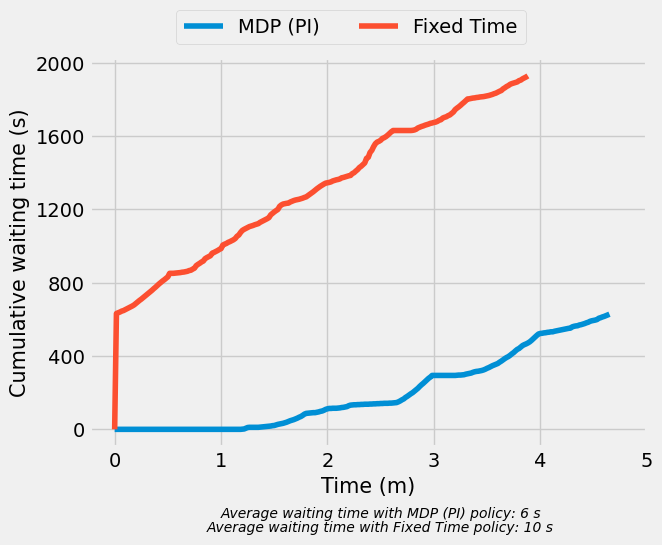

In [242]:
## The Fixed Time policy makes people arrive late!

plt.plot(range(len(cumulative_waiting_times['mdp'])), cumulative_waiting_times['mdp'], label='MDP (PI)')
plt.plot(range(len(cumulative_waiting_times['ft'])), cumulative_waiting_times['ft'], label='Fixed Time')

plt.xlabel('Time (m)', fontsize=15)
plt.ylabel('Cumulative waiting time (s)', fontsize=15)

plt.xticks([0, 60, 120, 180, 240, 300])

ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(nbins=6))

ax.set_xticklabels(['0', '1', '2', '3', '4', '5'])

plt.text(150,
         -0.6*ax.get_yticks()[3],
         f'Average waiting time with MDP (PI) policy: {cumulative_waiting_times["mdp"][-1]//n_stopped_cars["mdp"]} s',
         horizontalalignment='center',
         fontsize = 10,
         fontstyle = 'italic')
plt.text(150,
         -(0.6*ax.get_yticks()[3] + 0.2*ax.get_yticks()[2]),
         f'Average waiting time with Fixed Time policy: {cumulative_waiting_times["ft"][-1]//n_stopped_cars["ft"]} s',
         horizontalalignment='center',
         fontsize = 10,
         fontstyle = 'italic')

plt.legend(prop={'size': 14}, bbox_to_anchor=(0.8, 1.15), ncol=2)

plt.show()

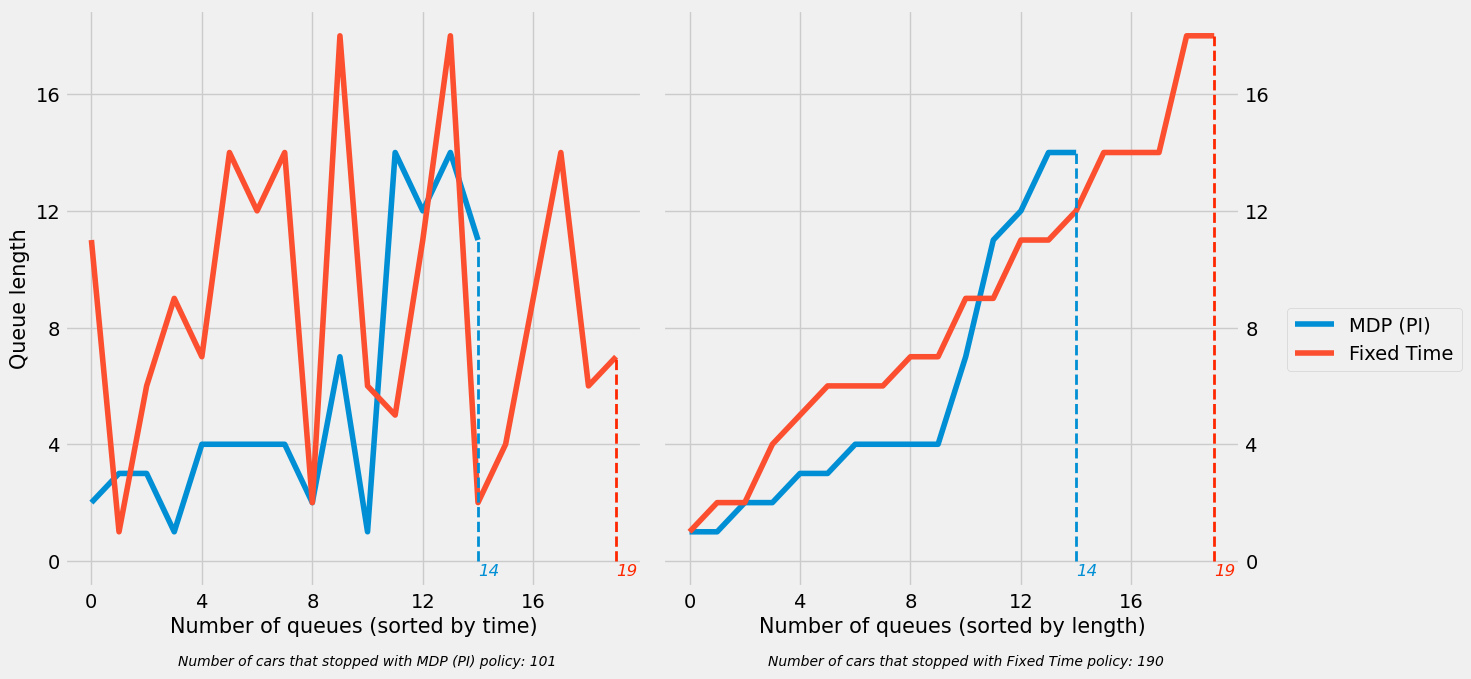

In [227]:
## Queues might become annoying with a Fixed Time policy!

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

axs[0].plot(range(len(queue_lengths['mdp'])), queue_lengths['mdp'], label='MDP (PI)')
axs[0].plot(range(len(queue_lengths['ft'])), queue_lengths['ft'], label='Fixed Time')

axs[0].set_xlabel('Number of queues (sorted by time)', fontsize=15)
axs[0].set_ylabel('Queue length', fontsize=15)

axs[0].yaxis.set_major_locator(MaxNLocator(nbins=6))
axs[0].xaxis.set_major_locator(MaxNLocator(nbins=6))

axs[0].text(0.5*max(axs[0].get_xticks()), -0.3*axs[0].get_yticks()[3], f'Number of cars that stopped with MDP (PI) policy: {n_stopped_cars["mdp"]}', horizontalalignment='center', fontsize = 10, fontstyle = 'italic')

axs[0].vlines(len(queue_lengths['mdp'])-1, 0, queue_lengths['mdp'][-1], color='#008FD5', linestyle='--', linewidth=2)
axs[0].text(len(queue_lengths['mdp'])-1, -0.5, len(queue_lengths['mdp'])-1, color='#008FD5', fontsize=12, fontstyle='italic')

axs[0].vlines(len(queue_lengths['ft'])-1, 0, queue_lengths['ft'][-1], color='#FF2700', linestyle='--', linewidth=2)
axs[0].text(len(queue_lengths['ft'])-1, -0.5, len(queue_lengths['ft'])-1, color='#FF2700', fontsize=12, fontstyle='italic')

axs[1].plot(range(len(queue_lengths['mdp'])), sorted(queue_lengths['mdp']), label='MDP (PI)')
axs[1].plot(range(len(queue_lengths['ft'])), sorted(queue_lengths['ft']), label='Fixed Time')

axs[1].set_xlabel('Number of queues (sorted by length)', fontsize=15)

axs[1].yaxis.set_major_locator(MaxNLocator(nbins=6))
axs[1].yaxis.tick_right()
axs[1].xaxis.set_major_locator(MaxNLocator(nbins=6))

axs[1].legend(prop={'size': 14}, bbox_to_anchor=(1.4, 0.5))

axs[1].text(0.5*max(axs[1].get_xticks()), -0.3*axs[1].get_yticks()[3], f'Number of cars that stopped with Fixed Time policy: {n_stopped_cars["ft"]}', horizontalalignment='center', fontsize = 10, fontstyle = 'italic')

axs[1].vlines(len(queue_lengths['mdp'])-1, 0, sorted(queue_lengths['mdp'])[-1], color='#008FD5', linestyle='--', linewidth=2)
axs[1].text(len(queue_lengths['mdp'])-1, -0.5, len(queue_lengths['mdp'])-1, color='#008FD5', fontsize=12, fontstyle='italic')

axs[1].vlines(len(queue_lengths['ft'])-1, 0, sorted(queue_lengths['ft'])[-1], color='#FF2700', linestyle='--', linewidth=2)
axs[1].text(len(queue_lengths['ft'])-1, -0.5, len(queue_lengths['ft'])-1, color='#FF2700', fontsize=12, fontstyle='italic')

plt.tight_layout()

plt.show()